In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start_date='2017-02-01'
end_date='2023-12-31'
stocks=['AAL']
df=yf.download(stocks,start=start_date,end=end_date)[['Open','Close']]
df

[*********************100%***********************]  1 of 1 completed


,Open,Close
Date,,
2017-01-31,44.790001,44.250000
2017-02-01,44.750000,44.049999
2017-02-02,43.610001,44.009998
2017-02-03,44.310001,44.200001
2017-02-06,44.799999,45.299999
...,...,...
2023-12-22,14.380000,14.310000
2023-12-26,14.250000,14.110000
2023-12-27,14.100000,13.990000


In [3]:
df[df.columns[0]]

Date
2017-01-31    44.790001
2017-02-01    44.750000
2017-02-02    43.610001
2017-02-03    44.310001
2017-02-06    44.799999
                ...    
2023-12-22    14.380000
2023-12-26    14.250000
2023-12-27    14.100000
2023-12-28    13.920000
2023-12-29    13.950000
Name: Open, Length: 1741, dtype: float64

In [16]:
#Moving parameters
rolling_windows_days=30
df['moving_average']=df[df.columns[0]].rolling(rolling_windows_days).mean().values
df['moving_std_dev']=df[df.columns[0]].rolling(rolling_windows_days).std()

In [17]:
df['upper_band']=df.moving_average+2*df.moving_std_dev
df['lower_band']=df.moving_average-2*df.moving_std_dev

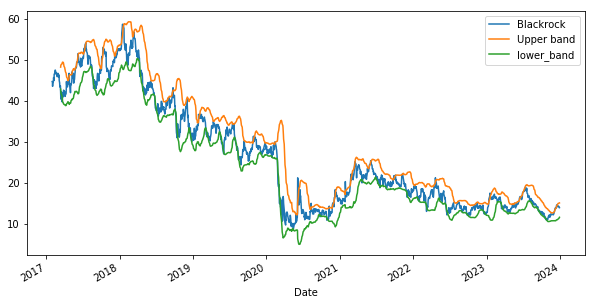

In [18]:
df[df.columns[0]].plot(label='Blackrock',figsize=(10,5))
df.upper_band.plot(label='Upper band')
df.lower_band.plot(label='lower_band')
plt.legend()
plt.show()

In [19]:
#Long Positions
df['short_entry']=df[df.columns[0]] < df.lower_band
df['short_exit']=df[df.columns[0]] > df.lower_band
df['positions_short']=np.nan
df.loc[df.short_entry,'positions_short']=-1
df.loc[df.short_exit,'positions_short']=0
df.positions_short=df.positions_short.fillna(method='ffill')
df

,Open,Close,moving_average,moving_std_dev,upper_band,lower_band,short_entry,short_exit,positions_short,Long_entry,Long_exit,positions_long
Date,,,,,,,,,,,,
2017-01-31,44.790001,44.250000,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2017-02-01,44.750000,44.049999,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2017-02-02,43.610001,44.009998,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2017-02-03,44.310001,44.200001,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2017-02-06,44.799999,45.299999,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,14.380000,14.310000,13.083333,0.949291,14.981916,11.184751,False,True,0.0,False,True,0.0
2023-12-26,14.250000,14.110000,13.169333,0.933573,15.036479,11.302188,False,True,0.0,False,True,0.0
2023-12-27,14.100000,13.990000,13.249333,0.905736,15.060806,11.437861,False,True,0.0,False,True,0.0


In [20]:
#Short positions
df['Long_entry']=df[df.columns[0]]>df.upper_band
df['Long_exit']=df[df.columns[0]]<df.upper_band
df['positions_long']=np.nan
df.loc[df.Long_entry,'positions_long']=1
df.loc[df.Long_exit,'positions_long']=0
df.positions_long=df.positions_long.fillna(method='ffill')
df

,Open,Close,moving_average,moving_std_dev,upper_band,lower_band,short_entry,short_exit,positions_short,Long_entry,Long_exit,positions_long
Date,,,,,,,,,,,,
2017-01-31,44.790001,44.250000,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2017-02-01,44.750000,44.049999,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2017-02-02,43.610001,44.009998,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2017-02-03,44.310001,44.200001,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2017-02-06,44.799999,45.299999,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,14.380000,14.310000,13.083333,0.949291,14.981916,11.184751,False,True,0.0,False,True,0.0
2023-12-26,14.250000,14.110000,13.169333,0.933573,15.036479,11.302188,False,True,0.0,False,True,0.0
2023-12-27,14.100000,13.990000,13.249333,0.905736,15.060806,11.437861,False,True,0.0,False,True,0.0


In [21]:
df[df['positions_short']==-1]['positions_short']

Date
2017-03-14   -1.0
2017-03-15   -1.0
2017-03-22   -1.0
2017-08-18   -1.0
2017-08-21   -1.0
             ... 
2023-09-13   -1.0
2023-09-14   -1.0
2023-09-15   -1.0
2023-10-19   -1.0
2023-10-23   -1.0
Name: positions_short, Length: 107, dtype: float64

In [22]:
df[df['positions_long']==1]['positions_long']

Date
2017-04-21    1.0
2017-04-24    1.0
2017-04-25    1.0
2017-04-26    1.0
2017-05-10    1.0
             ... 
2023-12-06    1.0
2023-12-07    1.0
2023-12-08    1.0
2023-12-14    1.0
2023-12-15    1.0
Name: positions_long, Length: 99, dtype: float64

In [23]:
df[df.columns[1]]#.pct_change().dropna()

Date
2017-01-31    44.250000
2017-02-01    44.049999
2017-02-02    44.009998
2017-02-03    44.200001
2017-02-06    45.299999
                ...    
2023-12-22    14.310000
2023-12-26    14.110000
2023-12-27    13.990000
2023-12-28    13.980000
2023-12-29    13.740000
Name: Close, Length: 1741, dtype: float64

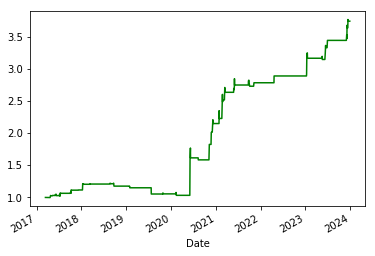

In [24]:
r=df['positions_long']*df[df.columns[1]].pct_change().dropna()
(1+r).cumprod().plot(color='g')

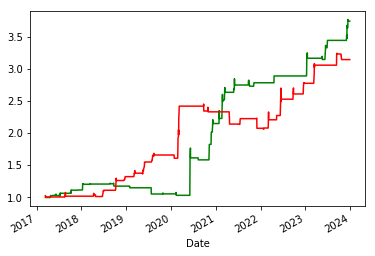

In [25]:
(1+df['positions_long']*df[df.columns[1]].pct_change().dropna()).cumprod().plot(color='g')
(1+df['positions_short']*df[df.columns[1]].pct_change().dropna()).cumprod().plot(color='r')
#(1+df[df.columns[1]].pct_change().dropna()).cumprod().plot()